In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import datasets

In [3]:
iris = datasets.load_iris()

In [4]:
X = iris.data[:,0:2]

In [5]:
y = iris.target

In [8]:
X[:3]

array([[ 5.1,  3.5],
       [ 4.9,  3. ],
       [ 4.7,  3.2]])

In [9]:
n_features = X.shape[1]

In [11]:
n_features

2L

In [13]:
for key, value in iris.items():
    try:
        print key, value.shape
    except:
        print key

target_names (3L,)
data (150L, 4L)
target (150L,)
DESCR DESCR
feature_names feature_names


In [16]:
C = 1.0
classifiers = {'L1 logistic':LogisticRegression(C=C, penalty = 'l1'), 'L2 logistic(OvR)': LogisticRegression(C=C, penalty= 'l2')
              , 'Linear SVC': SVC(kernel = 'linear',C=C, probability=True, random_state=0), 'L2 Logistic(Multinomial)': LogisticRegression(C=C,
                solver = 'lbfgs',multi_class = 'multinomial' )}

In [23]:
n_classifiers = len(classifiers)

plt.figure(figsize=(3 * 2, n_classifiers * 2))
plt.subplots_adjust(bottom=.2, top=.95)


xx = np.linspace(3,9,100)
yy = np.linspace(1,5,100)
xx, yy = np.meshgrid(xx, yy)
Xfull = np.c_[xx.ravel(), yy.ravel()]

In [24]:
fig = plt.figure(figsize=(12,12), dpi=300)

classif_rate for L2 logistic(OvR) :76.6666666667
classif_rate for L2 Logistic(Multinomial) :82.0
classif_rate for L1 logistic :79.3333333333
classif_rate for Linear SVC :82.0


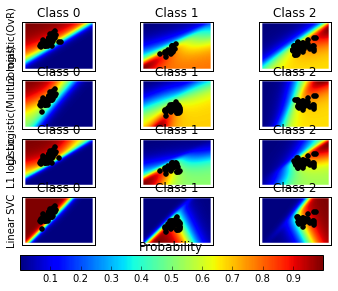

In [25]:
for index, (name, classifier) in enumerate(classifiers.items()):
    classifier.fit(X, y)
    y_pred = classifier.predict(X)
    classif_rate = np.mean(y_pred.ravel() ==y.ravel())*100
    print "classif_rate for %s :%s" % (name, classif_rate)
    
    probas = classifier.predict_proba(Xfull)
    n_classes = np.unique(y_pred).size
    for k in range(n_classes):
        plt.subplot(n_classifiers, n_classes, index*n_classes +k +1)
        plt.title("Class %d" % k)
        if k==0:
            plt.ylabel(name)
        imshow_handle = plt.imshow(probas[:,k].reshape((100,100)), extent = (3,9,1,5), origin = 'lower')
        
        plt.xticks(())
        plt.yticks(())
        idx = (y_pred == k)
        if idx.any():
            plt.scatter(X[idx,0], X[idx,1], marker = 'o', c='k')

ax = plt.axes([0.15, 0.04, 0.7, 0.05])
plt.title("Probability")
plt.colorbar(imshow_handle, cax=ax, orientation='horizontal')

plt.show()